In [2]:
import pandas as pd

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
#%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas.util._decorators'

In [11]:
# FCST_lags = pd.read_excel(r'FCST_lags.xlsx',sheetname='lags')
# macro_df = pd.read_excel(r'India Macro Data.xlsx')
# siv_df = pd.read_excel(r'2016-18 SIV.xlsx')

# FCST_lags.to_pickle('FCST_lags.pkl')
# siv_df.to_pickle('siv_df.pkl')
# macro_df.to_pickle('macro_data.pkl')

# siv_df_rel = pd.read_excel(r'2016-18 SIV.xlsx',sheetname="Relevant data")
# siv_df_rel.to_pickle('siv_relevant_data.pkl')

In [24]:
siv_df_rel.columns

Index(['Global PCtr Hr Lvl4 (LOB)', 'Fiscal year/period', 'Global Premium Ind',
       'Distributor', 'Global Product Famly', 'STRIPES Code', 'Volume (L)',
       'Sector'],
      dtype='object')

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_excel(r'dataprep1.xlsx',sheetname='data_poc')

df.columns

df.columns = (['Distributor', 'STRIPES_Code', 'month-year', 'Date', 'year','siv'])

In [6]:
df.set_index('Date',inplace=True)

In [7]:
df

,Distributor,STRIPES_Code,month-year,year,siv
Date,,,,,
2016-01-28,Super Transports P Ltd,139530,JAN 2016,2016,840.00
2016-02-28,Super Transports P Ltd,139530,FEB 2016,2016,"2,100.07"
2016-03-28,Super Transports P Ltd,139530,MAR 2016,2016,420.08
2016-04-28,Super Transports P Ltd,139530,APR 2016,2016,"1,400.00"
2016-05-28,Super Transports P Ltd,139530,MAY 2016,2016,770.04
2016-06-28,Super Transports P Ltd,139530,JUN 2016,2016,"2,310.27"
2016-07-28,Super Transports P Ltd,139530,JUL 2016,2016,840.16
2016-08-28,Super Transports P Ltd,139530,AUG 2016,2016,"1,050.04"
2016-09-28,Super Transports P Ltd,139530,SEP 2016,2016,"1,610.03"


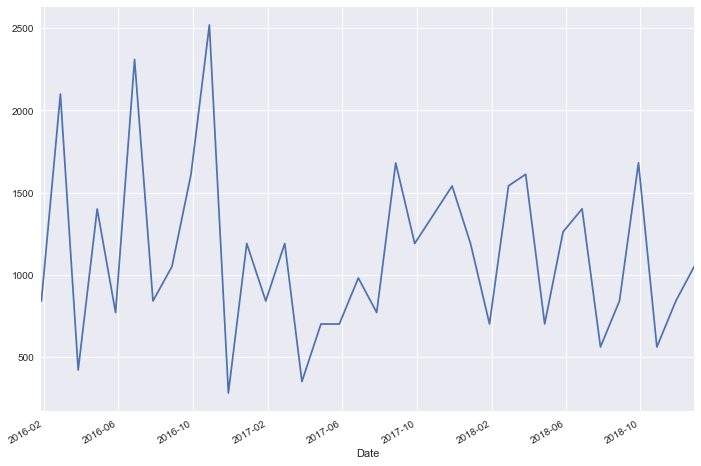

In [8]:
df.siv.plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


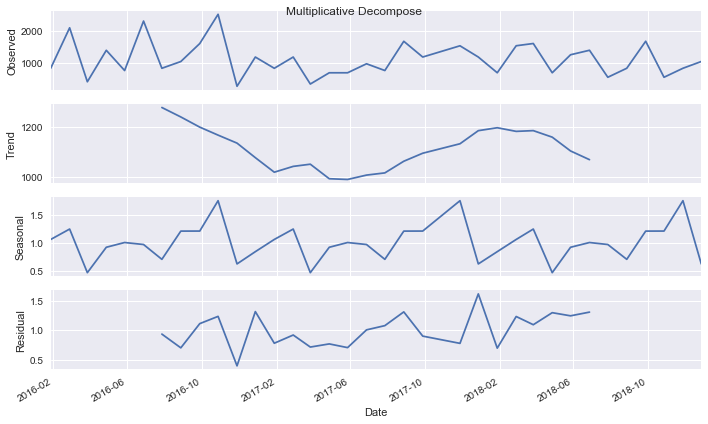

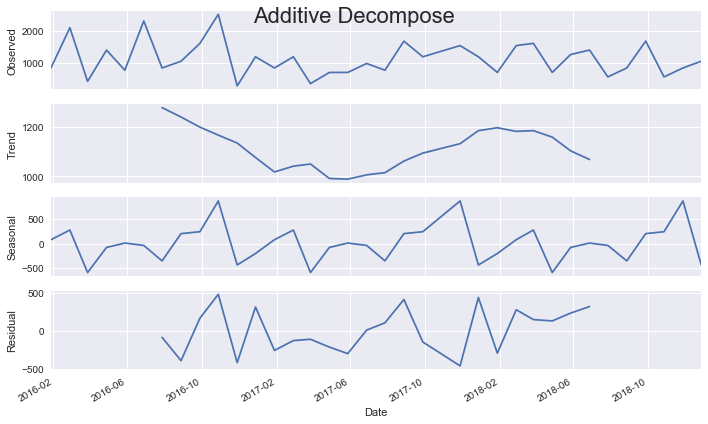

In [49]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['siv'], model='multiplicative',freq = 12)

# Additive Decomposition
result_add = seasonal_decompose(df.siv, model='additive',freq = 12)

#Plot
plt.rcParams.update({'figure.figsize': (10,6)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

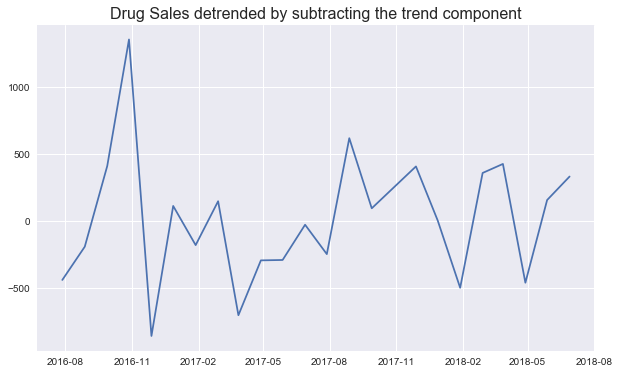

In [51]:
detrended = df.siv.values - result_add.trend
plt.plot(detrended)
plt.title('monthly Demand detrended by subtracting the trend component', fontsize=16)

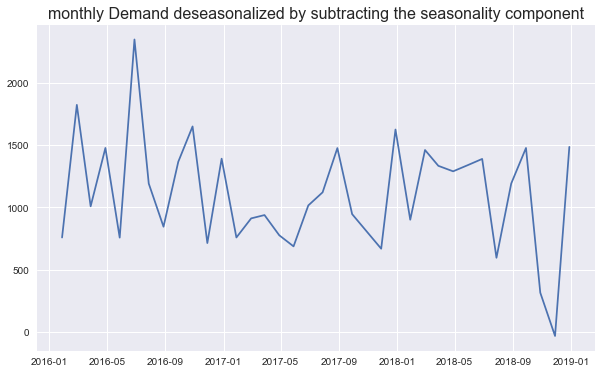

In [53]:
# Time Series Decomposition
# Deseasonalize
deseasonalized = df.siv.values - result_add.seasonal
plt.plot(deseasonalized)
plt.title('monthly Demand deseasonalized by subtracting the seasonality component', fontsize=16)

In [54]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.siv.tolist())

ModuleNotFoundError: No module named 'pandas.plotting'

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.siv.tolist(), lags=10, ax=axes[0])
plot_pacf(df.siv.tolist(), lags=10, ax=axes[1])

ModuleNotFoundError: No module named 'pandas.util._decorators'

In [94]:
from pyramid.arima import auto_arima

ImportError: numpy.core.multiarray failed to import

In [59]:
!pip install pyramid-arima

  Attempting uninstall: patsy
    Found existing installation: patsy 0.4.1
    Uninstalling patsy-0.4.1:


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: statsmodels 0.11.1 has requirement numpy>=1.14, but you'll have numpy 1.11.3 which is incompatible.
ERROR: statsmodels 0.11.1 has requirement pandas>=0.21, but you'll have pandas 0.19.2 which is incompatible.
ERROR: statsmodels 0.11.1 has requirement scipy>=1.0, but you'll have scipy 0.18.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\patsy\\build.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [101]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [112]:
model = ARIMA(df.siv, order=(3,2,1))
model_fit = model.fit(disp=0)
#print (summary of fit model)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D2.siv   No. Observations:                   33
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -255.293
Method:                       css-mle   S.D. of innovations            490.140
Date:                Fri, 29 May 2020   AIC                            522.586
Time:                        02:15:55   BIC                            531.565
Sample:                    03-28-2016   HQIC                           525.607
                         - 12-28-2018                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.3940      2.736     -0.144      0.887        -5.757     4.969
ar.L1.D2.siv    -1.0785      0.136     -7.923      0.000        -1.345    -0.812
ar.L2.D2.siv    -0.8643      0.175     -4.92

In [104]:
model = ARMA(df.siv, order=(2,1))
model_fit = model.fit(disp=0)
#print (summary of fit model)
print(model_fit.summary())

LinAlgError: SVD did not converge

In [71]:
# model = ARIMA(df.siv, order=(2,1,2), freq='M')
# fit = model.fit()

# fit.summary()

In [1]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=True)
plt.show()

NameError: name 'model_fit' is not defined

In [84]:
from pmdarima.arima.utils import ndiffs

ModuleNotFoundError: No module named 'pmdarima'

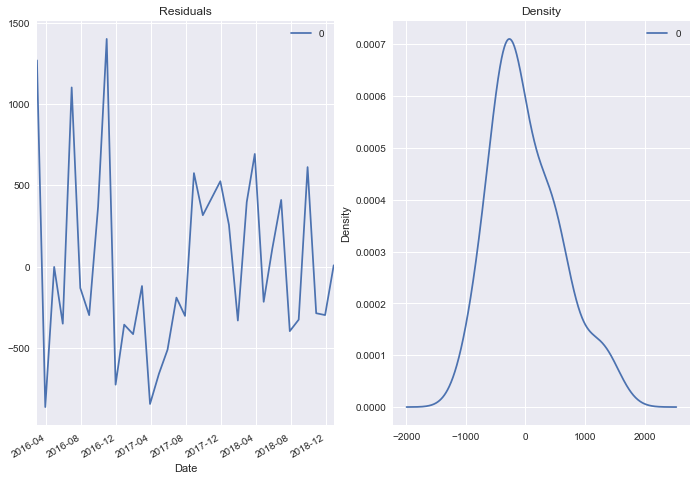

In [77]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [10]:
pd.__version__

'0.19.2'

In [11]:
import statsmodels as sm